# Multiple Regression Model.

# Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Importing the data set


In [4]:
df = pd.read_csv('/content/50_Startups.csv')

print("Dataset Preview:")
print(df.head())

Dataset Preview:
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


# Encoding the categorical data

In [5]:
df_encoded = pd.get_dummies(df, columns=['State'], drop_first=True)

print("\nEncoded Columns:")
print(df_encoded.columns)


Encoded Columns:
Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')


# Define features and taregts

In [6]:
X = df_encoded.drop('Profit', axis=1)
y = df_encoded['Profit']

# Splitting the dataset into training set and test set


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train multiple regression model

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model coefficeints

In [9]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
    })
print("\nModel Coefficients (Impact on Profit):")
print(coefficients)

print("\nIntercept:")
print(model.intercept_)


Model Coefficients (Impact on Profit):
           Feature  Coefficient
0        R&D Spend     0.805630
1   Administration    -0.068788
2  Marketing Spend     0.029855
3    State_Florida   938.793006
4   State_New York     6.987760

Intercept:
54028.03959364581


# Model evaluation

In [10]:
y_pred = model.predict(X_test)

print("\nModel Performance:")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Model Performance:
R² Score: 0.8987266414328637
Mean Squared Error: 82010363.04430099


# Actual vs Predicted plot

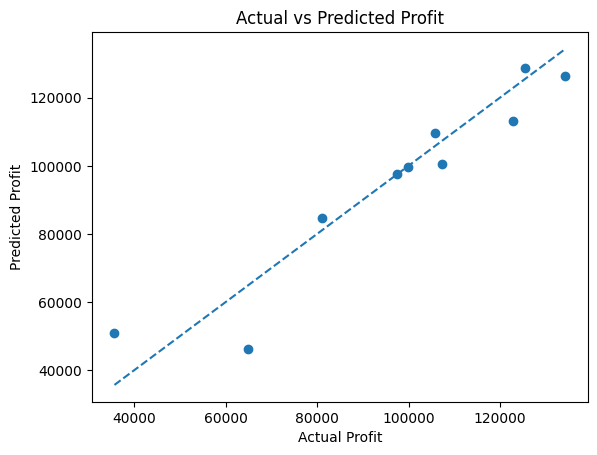

In [11]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.show()

# Predict profit for all companies

In [12]:
df['Predicted_Profit'] = model.predict(X)

# Company that should earn the most profit (model-based)
best_company = df.loc[df['Predicted_Profit'].idxmax()]

print("\nCompany with Highest Predicted Profit:")
print(best_company)


Company with Highest Predicted Profit:
R&D Spend                165349.2
Administration           136897.8
Marketing Spend          471784.1
State                    New York
Profit                  192261.83
Predicted_Profit    191913.727404
Name: 0, dtype: object


# Future profit prediction

In [13]:
future_company = pd.DataFrame({
    'R&D Spend': [160000],
    'Administration': [140000],
    'Marketing Spend': [300000],
    'State_Florida': [0],
    'State_New York': [1]
})

future_profit = model.predict(future_company)

print("\nPredicted Profit for Future Company:")
print(future_profit[0])


Predicted Profit for Future Company:
182262.16690606324
